# Data Science QUESTION 2

  
You'll be asked to do some analysis and modeling tasks on a dataset created.  
The dataset concerns a video gaming company that has information on its customers and would like to gain more insights on what drives their customers to play for longer hours.  

The following tables are provided:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_districts_house_prices = pd.read_csv("/content/drive/MyDrive/Tools and Techniques - Midterm/df_districts_house_prices.csv")
df_person_data = pd.read_csv("/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_data.csv")
df_person_district = pd.read_csv("/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_district.csv")

df_person_district

includes information about each customer (person) and the district they live in

- person_id: the person id
- district: the name of the district

In [ ]:
df_person_district

,person_id,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey
...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar


df_districts_house_prices

includes information about each district and the prices of the houses in the district

- district: the name of the district
- house_price: the price of the house
- house_number: the house number in the district

In [ ]:
df_districts_house_prices

,district,house_price,house_number
0,Celowsgan,160652.0,1
1,Celowsgan,159219.0,2
2,Celowsgan,161543.0,3
3,Celowsgan,158944.0,4
4,Celowsgan,164121.0,5
...,...,...,...
1358,El Willong,932441.0,30
1359,El Willong,890190.0,31
1360,El Willong,892096.0,32
1361,El Willong,935117.0,33


df_person_data

includes personal information about each of the customers and relevant information to their video gaming habits

- person_id: identifier for a person
- age: the age of the person
- n_kids: the number of kids this person has
- n_vg: the number of video games the person owns
- n_con: the number of video game consols the person owns
- n_presub: the number of premium subscription the person owns
- n_hours_playing: the total number of hours this person play per month 

In [ ]:
df_person_data

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397


## Quick EDA

The goals of these questions is to evaluate your plotting, data mangling, and plot interpretation skills.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

1. Plot each district's house prices distribution with marking the mean by a vertical line


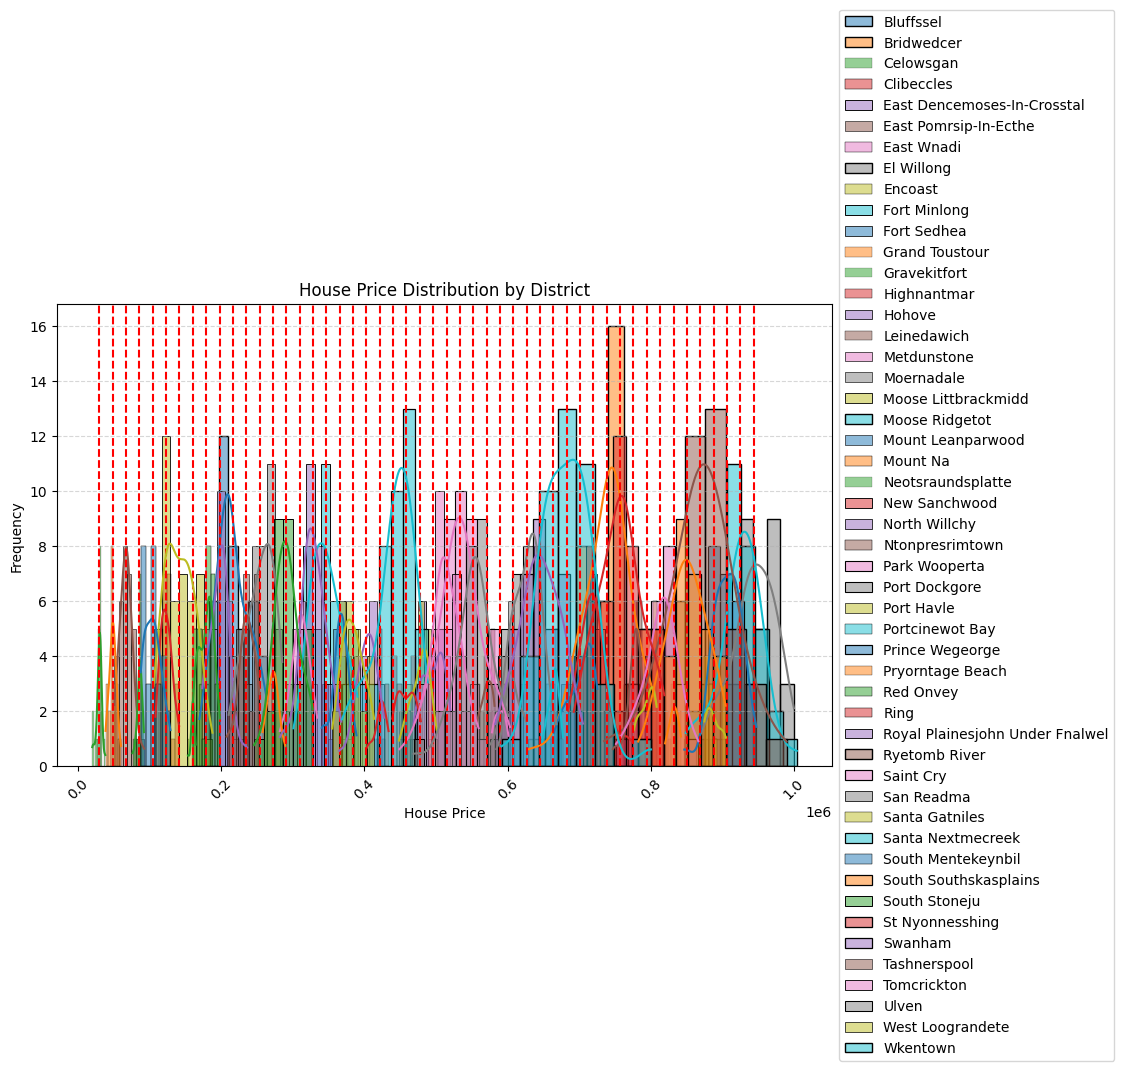

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = df_districts_house_prices.groupby('district')

fig, ax = plt.subplots(figsize=(10, 6))

for district, group in grouped_data:
    
    sns.histplot(group['house_price'], ax=ax, label=district, kde=True)

    district_mean = group['house_price'].mean()

 
    ax.axvline(district_mean, color='red', linestyle='--')

ax.set_xlabel('House Price')
ax.set_ylabel('Frequency')
ax.set_title('House Price Distribution by District')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.grid(True, axis='y', linestyle='--', alpha=0.5)


plt.xticks(rotation=45)

plt.show()


### 2. Combine all of the three data sources into one table to use in further analysis. 

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_data.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_district.csv')

merged_df = pd.merge(df2, df3, on='person_id')

merged_df.to_csv('merged_file.csv', index=False)


In [ ]:
#Just checking my merged files here sir
Tdf= pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/merged_file.csv')
Tdf

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141,Red Onvey
...,...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397,Highnantmar


In [ ]:

df1 = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/merged_file.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_districts_house_prices.csv')


merged_df = pd.merge(df1, df4, on='district')
merged_df.to_csv('Second_merged_file.csv', index=False)

In [ ]:
Tdf2 = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/Second_merged_file.csv')
Tdf2

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,district,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,323177.0,1
1,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,NaN,2
2,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,333360.0,3
3,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,319360.0,4
4,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,333934.0,5
...,...,...,...,...,...,...,...,...,...,...
2014062,658bac69-5813-4144-a00a-9cf6f1c79fa0,18.0,2,63,0,1,424.377876,El Willong,932441.0,30
2014063,658bac69-5813-4144-a00a-9cf6f1c79fa0,18.0,2,63,0,1,424.377876,El Willong,890190.0,31
2014064,658bac69-5813-4144-a00a-9cf6f1c79fa0,18.0,2,63,0,1,424.377876,El Willong,892096.0,32
2014065,658bac69-5813-4144-a00a-9cf6f1c79fa0,18.0,2,63,0,1,424.377876,El Willong,935117.0,33


### 3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts)

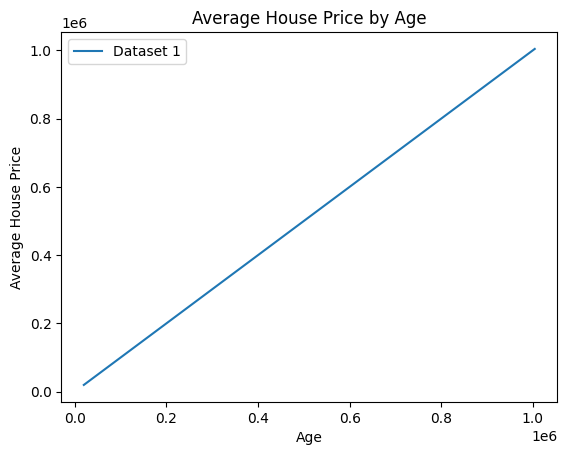

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_districts_house_prices.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_data.csv')


age_column_name = 'age'  
price_column_name = 'house_price'  


avg_price1 = df1.groupby(price_column_name)[price_column_name].mean()

plt.plot(avg_price1.index, avg_price1.values, label='Dataset 1')
plt.xlabel('Age')
plt.ylabel('Average House Price')
plt.title('Average House Price by Age')

plt.legend()
plt.show()





## Probability and Statistics:

The goal of these questions is to test your ability to answer probability and stat questions with code.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   


**What**'s the probability of a customer having 2 kids

In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_data.csv')  # Replace 'customer_data.csv' with your actual dataset file

total_customers = len(df)


customers_with_2_kids = len(df[df['n_kids'] == 2])


probability_2_kids = customers_with_2_kids / total_customers

print("Probability of a customer having 2 kids:", probability_2_kids)


Probability of a customer having 2 kids: 0.10017142857142858


### 2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_data.csv')  # Replace 'customer_data.csv' with your actual dataset file

customers_less_than_2_kids = df[df['n_kids'] < 2]
customers_meeting_conditions = customers_less_than_2_kids[customers_less_than_2_kids['n_vg'] > 10]
probability = len(customers_meeting_conditions) / len(customers_less_than_2_kids)

print("Probability of owning more than 10 video games given less than 2 kids:", probability)


Probability of owning more than 10 video games given less than 2 kids: 0.4018363273453094


### 3. Plot the distribution of the number of hours played by customers `n_hours_playing`. Briefly explain what you understand now about the customers' playing hours.

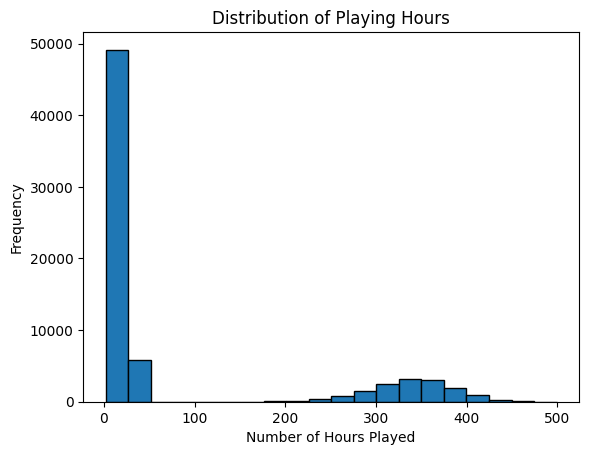

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_data.csv')
plt.hist(df['n_hours_playing'], bins=20, edgecolor='k')
plt.xlabel('Number of Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Playing Hours')
plt.show()


As you can see, most customers have a number of hours less than 50 so let's go ahead and remove any values less than 50.  
The distribution of the remaining values look like a normal distribution.  
###  4. Estimate the parameters (mean and std deviation) of this normal distribution computationally.  \
### (Bonus: plot the estimated normal distribution on top of the distribution of `n_hours_playing` after removing values < 50)

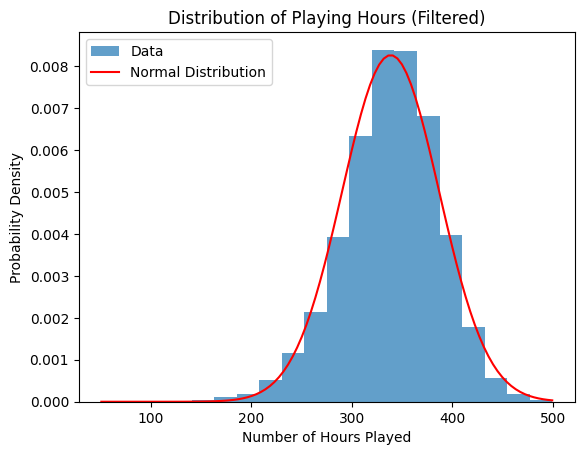

Estimated mean: 338.54501334662666
Estimated standard deviation: 48.2925792379227


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

df = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_data.csv')


filtered_data = df[df['n_hours_playing'] >= 50]['n_hours_playing']

# Estimate the parameters of the normal distribution
mu, sigma = norm.fit(filtered_data)

# Plot the distribution of n_hours_playing after removing values less than 50
plt.hist(filtered_data, bins=20, density=True, alpha=0.7, label='Data')
plt.xlabel('Number of Hours Played')
plt.ylabel('Probability Density')
plt.title('Distribution of Playing Hours (Filtered)')

# Plot the estimated normal distribution
x = np.linspace(filtered_data.min(), filtered_data.max(), 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r-', label='Normal Distribution')

plt.legend()
plt.show()

print('Estimated mean:', mu)
print('Estimated standard deviation:', sigma)


# Modeling
The goal of this is to showcase your experimentation and model comparison process.  
The performance of models is not as important as how you compare them and evaluate them against each other.  

Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   
# Apply Different regression model 
# Apply two classffier Model for the data of classfication ( as per your choice)

### 1. Model the number of hours played for each customer. Show your experimentation with failed and successful models.
### 2. Evaluate each experiment using appropriate metrics, cross validation, and plots. Show the predicted vs actual plot.
### 3. Choose the best model for the data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Tools and Techniques - Midterm/df_person_data.csv')
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})


Shape Of The Dataset : (70000, 7)

Glimpse Of The Dataset :


,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.000000,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.000000,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.000000,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.000000,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.000000,1,58,1,3,20.367141


In [5]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   person_id        70000 non-null  object 
 1   age              69990 non-null  float64
 2   n_kids           70000 non-null  int64  
 3   n_vg             70000 non-null  int64  
 4   n_con            70000 non-null  int64  
 5   n_presub         70000 non-null  int64  
 6   n_hours_playing  70000 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 3.7+ MB
None


In [6]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

Summary Of The Dataset :


,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
count,69990.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,24.993370,1.009357,38.292471,1.082029,1.571129,86.585073
std,8.017634,1.448087,33.592036,1.269356,1.328370,133.665569
min,14.000000,0.000000,0.000000,0.000000,0.000000,1.907035
25%,19.000000,0.000000,2.000000,0.000000,0.000000,14.358926
50%,22.000000,0.000000,50.000000,1.000000,1.000000,21.534073
75%,32.000000,2.000000,68.000000,2.000000,3.000000,30.036520
max,54.000000,5.000000,114.000000,5.000000,6.000000,499.362327


In [9]:
data.describe(include=int).T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,count,mean,std,min,25%,50%,75%,max
n_kids,70000.000000,1.009357,1.448087,0.000000,0.000000,0.000000,2.000000,5.000000
n_vg,70000.000000,38.292471,33.592036,0.000000,2.000000,50.000000,68.000000,114.000000
n_con,70000.000000,1.082029,1.269356,0.000000,0.000000,1.000000,2.000000,5.000000
n_presub,70000.000000,1.571129,1.328370,0.000000,0.000000,1.000000,3.000000,6.000000


In [10]:
data.describe(include=float).T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,count,mean,std,min,25%,50%,75%,max
age,69990.000000,24.993370,8.017634,14.000000,19.000000,22.000000,32.000000,54.000000
n_hours_playing,70000.000000,86.585073,133.665569,1.907035,14.358926,21.534073,30.036520,499.362327


In [11]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,count,unique,top,freq
person_id,70000,70000,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,1


In [12]:
dup = data[data.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 70000 entries in this dataset.
After removing duplicate entries there are 70000 entries in this dataset.


In [13]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

Null values of the Dataset :


,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,0,10,0,0,0,0,0


In [14]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

After dropping null values, the shape of the Dataset is (69990, 7)
After dropping null values, null values of the Dataset :


,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,0,0,0,0,0,0,0


In [15]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

After preprocessing, let's have a look on the summary of the dataset :


,count,mean,std,min,25%,50%,75%,max
age,69990.000000,24.993370,8.017634,14.000000,19.000000,22.000000,32.000000,54.000000
n_kids,69990.000000,1.009387,1.448112,0.000000,0.000000,0.000000,2.000000,5.000000
n_vg,69990.000000,38.293785,33.591865,0.000000,2.000000,50.000000,68.000000,114.000000
n_con,69990.000000,1.082055,1.269373,0.000000,0.000000,1.000000,2.000000,5.000000
n_presub,69990.000000,1.571153,1.328299,0.000000,0.000000,1.000000,3.000000,6.000000
n_hours_playing,69990.000000,86.589125,133.667443,1.907035,14.358759,21.533527,30.037656,499.362327


In [16]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,count,unique,top,freq
person_id,69990,69990,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,1


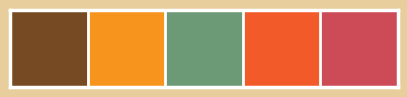

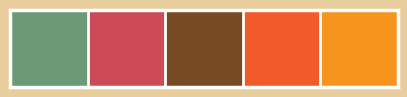

In [21]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#E8CE9D","figure.facecolor":"#E8CE9D","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#764a23","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

sns.palplot(sns.color_palette(palette))
sns.palplot(sns.color_palette(palette_cmap))
plt.show()

Age and Kids compare :


KeyboardInterrupt: ignored

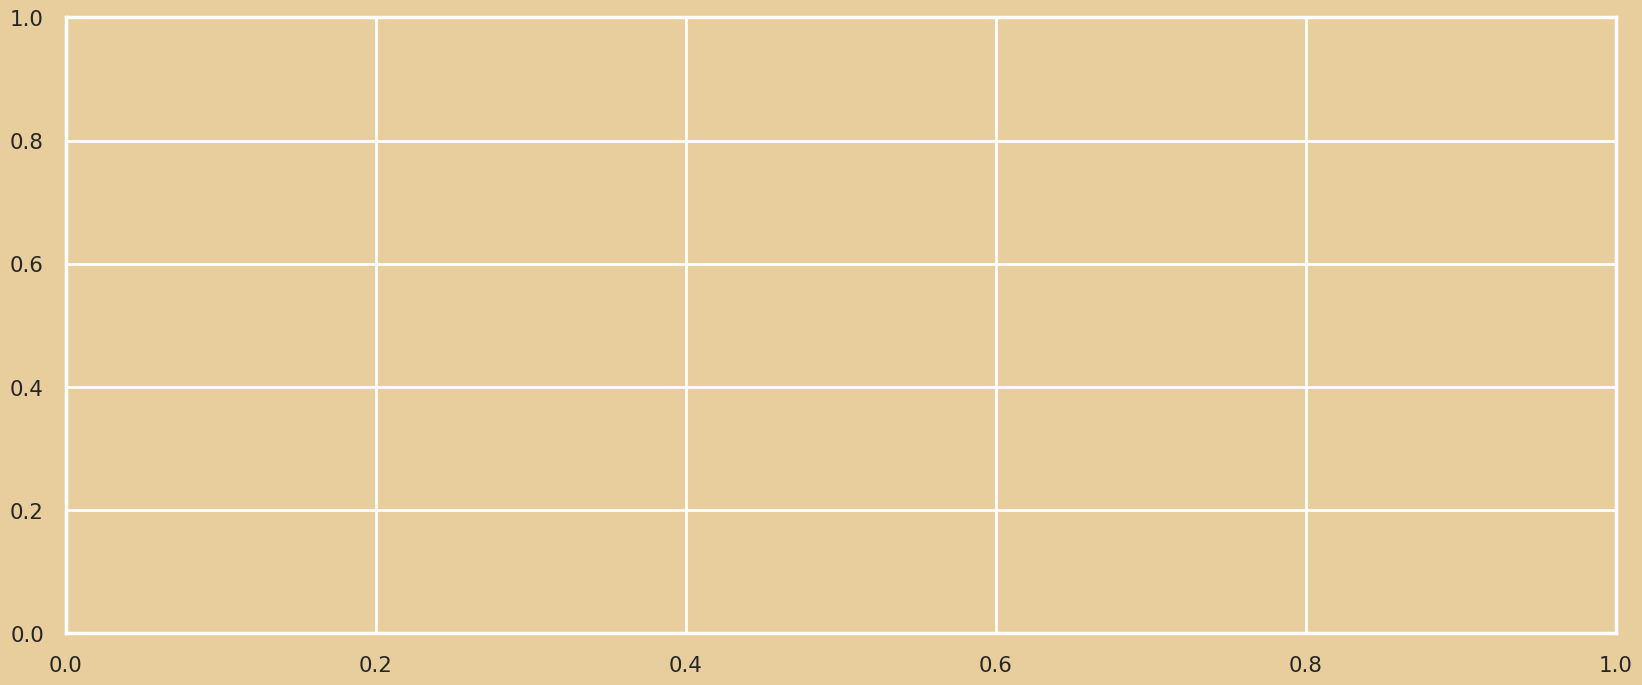

In [28]:
print(f"Age and Kids compare :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["age"] > 0],x="age",hue="n_hours_playing",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nAge and Kids compare :\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

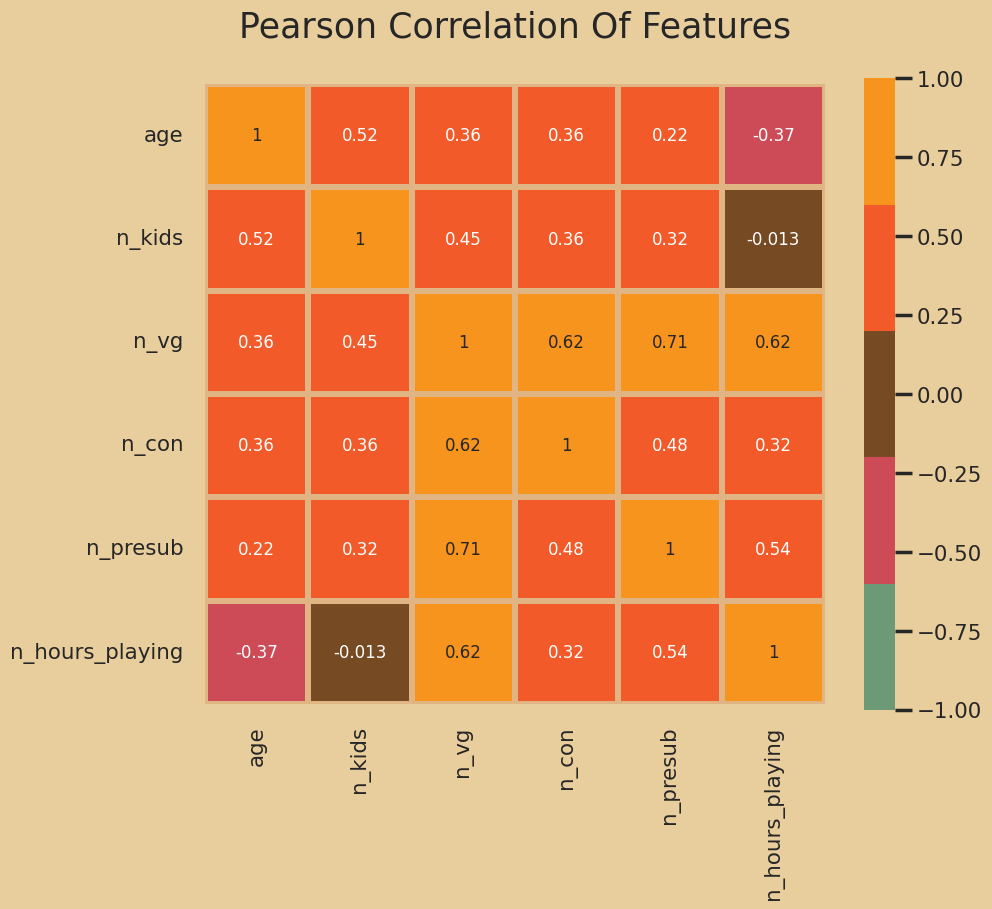

In [29]:
catcol = [col for col in data.columns if data[col].dtype == "int"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(10, 10))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [31]:
x = data.drop(["person_id"],axis =1)
y = data["n_presub"]

sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (55992, 6), (55992,)
Shape of testing data : (13998, 6), (13998,)


In [32]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[3915    0    0    0    0    0    0]
 [   0 3183    0    0    0    0    0]
 [   0    0 3399    0    0    0    0]
 [   0    0    0 2508    0    0    0]
 [   0    0    0    0  691    0    0]
 [   0    0    0    0    0  255    0]
 [   0    0    0    0    0    0   47]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       1.00      1.00      1.00      3183
           2       1.00      1.00      1.00      3399
           3       1.00      1.00      1.00      2508
           4       1.00      1.00      1.00       691
           5       1.00      1.00      1.00       255
           6       1.00      1.00      1.00        47

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998


The Accuracy of Logistic Regression is 100.0 %


In [33]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[3915    0    0    0    0    0    0]
 [   0 3183    0    0    0    0    0]
 [   0    0 3399    0    0    0    0]
 [   0    0    0 2508    0    0    0]
 [   0    0    0    0  691    0    0]
 [   0    0    0    0    0  255    0]
 [   0    0    0    0    0    0   47]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       1.00      1.00      1.00      3183
           2       1.00      1.00      1.00      3399
           3       1.00      1.00      1.00      2508
           4       1.00      1.00      1.00       691
           5       1.00      1.00      1.00       255
           6       1.00      1.00      1.00        47

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998


The Accuracy of Gaussian Naive Bayes is 100.0 %


In [34]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[3496  419    0    0    0    0    0]
 [1702 1481    0    0    0    0    0]
 [   0    0 2681   29  689    0    0]
 [   0    0 1617   44  847    0    0]
 [   0    0   17   27  647    0    0]
 [   0    0    9   13  233    0    0]
 [   0    0    1    2   44    0    0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.67      0.89      0.77      3915
           1       0.78      0.47      0.58      3183
           2       0.62      0.79      0.69      3399
           3       0.38      0.02      0.03      2508
           4       0.26      0.94      0.41       691
           5       0.00      0.00      0.00       255
           6       0.00      0.00      0.00        47

    accuracy                           0.60     13998
   macro avg       0.39      0.44      0.36     13998
weighted avg       0.60      0.60      0.54     13998


The Accuracy of Bernoulli Naive Bayes is 59.64 %


In [35]:
svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[3915    0    0    0    0    0    0]
 [   0 3183    0    0    0    0    0]
 [   0    0 3399    0    0    0    0]
 [   0    0    0 2508    0    0    0]
 [   0    0    0    0  691    0    0]
 [   0    0    0    0    0  255    0]
 [   0    0    0    0    0    0   47]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       1.00      1.00      1.00      3183
           2       1.00      1.00      1.00      3399
           3       1.00      1.00      1.00      2508
           4       1.00      1.00      1.00       691
           5       1.00      1.00      1.00       255
           6       1.00      1.00      1.00        47

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998


The Accuracy of Support Vector Machine is 100.0 %


In [36]:
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[3915    0    0    0    0    0    0]
 [   0 3183    0    0    0    0    0]
 [   0    0 3399    0    0    0    0]
 [   0    0    0 2508    0    0    0]
 [   0    0    0    0  691    0    0]
 [   0    0    0    0    2  253    0]
 [   0    0    0    0    0    0   47]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       1.00      1.00      1.00      3183
           2       1.00      1.00      1.00      3399
           3       1.00      1.00      1.00      2508
           4       1.00      1.00      1.00       691
           5       1.00      0.99      1.00       255
           6       1.00      1.00      1.00        47

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998


The Accuracy of Random Forest Classifier is 99.99 %


In [37]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[3913    2    0    0    0    0    0]
 [   0 3182    1    0    0    0    0]
 [   0    0 3399    0    0    0    0]
 [   0    0    1 2507    0    0    0]
 [   0    0    0    1  690    0    0]
 [   0    0    0    0    5  250    0]
 [   0    0    0    0    0    5   42]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       1.00      1.00      1.00      3183
           2       1.00      1.00      1.00      3399
           3       1.00      1.00      1.00      2508
           4       0.99      1.00      1.00       691
           5       0.98      0.98      0.98       255
           6       1.00      0.89      0.94        47

    accuracy                           1.00     13998
   macro avg       1.00      0.98      0.99     13998
weighted avg       1.00      1.00      1.00     13998


The Accuracy of K Nearest Neighbors Classifier is 99.89 %


In [39]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

regularization_parameter = 0.003

neural_model = Sequential([tf.keras.layers.Dense(units=32, input_dim=(x_train.shape[-1]), activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(units=16,activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=1, activation="sigmoid")
                    ])

print(neural_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,737
Trainable params: 12,737
Non-traina

In [40]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()


neural_model.compile(optimizer = Adam(learning_rate = 0.001), 
                     loss = "binary_crossentropy", 
                     metrics = ["accuracy"])

history = neural_model.fit(x_train, y_train,
                           epochs = 150,
                           verbose = 1,
                           batch_size = 64,
                           validation_data = (x_test, y_test),
                           callbacks = [callbacks])

Epoch 1/150
875/875 [==============================] - 9s 8ms/step - loss: -24579100.0000 - accuracy: 0.4185 - val_loss: -159108672.0000 - val_accuracy: 0.4917
Epoch 2/150
875/875 [==============================] - 6s 7ms/step - loss: -1662560384.0000 - accuracy: 0.3854 - val_loss: -4771177472.0000 - val_accuracy: 0.3593
Epoch 3/150
875/875 [==============================] - 4s 4ms/step - loss: -14476847104.0000 - accuracy: 0.3128 - val_loss: -28622495744.0000 - val_accuracy: 0.2274
Epoch 4/150
875/875 [==============================] - 3s 3ms/step - loss: -58138042368.0000 - accuracy: 0.2277 - val_loss: -94713462784.0000 - val_accuracy: 0.2274
Epoch 5/150
875/875 [==============================] - 2s 3ms/step - loss: -158589878272.0000 - accuracy: 0.2269 - val_loss: -230954237952.0000 - val_accuracy: 0.2274
Epoch 6/150
875/875 [==============================] - 3s 3ms/step - loss: -346559414272.0000 - accuracy: 0.2265 - val_loss: -469570715648.0000 - val_accuracy: 0.2274
Epoch 7/150
8

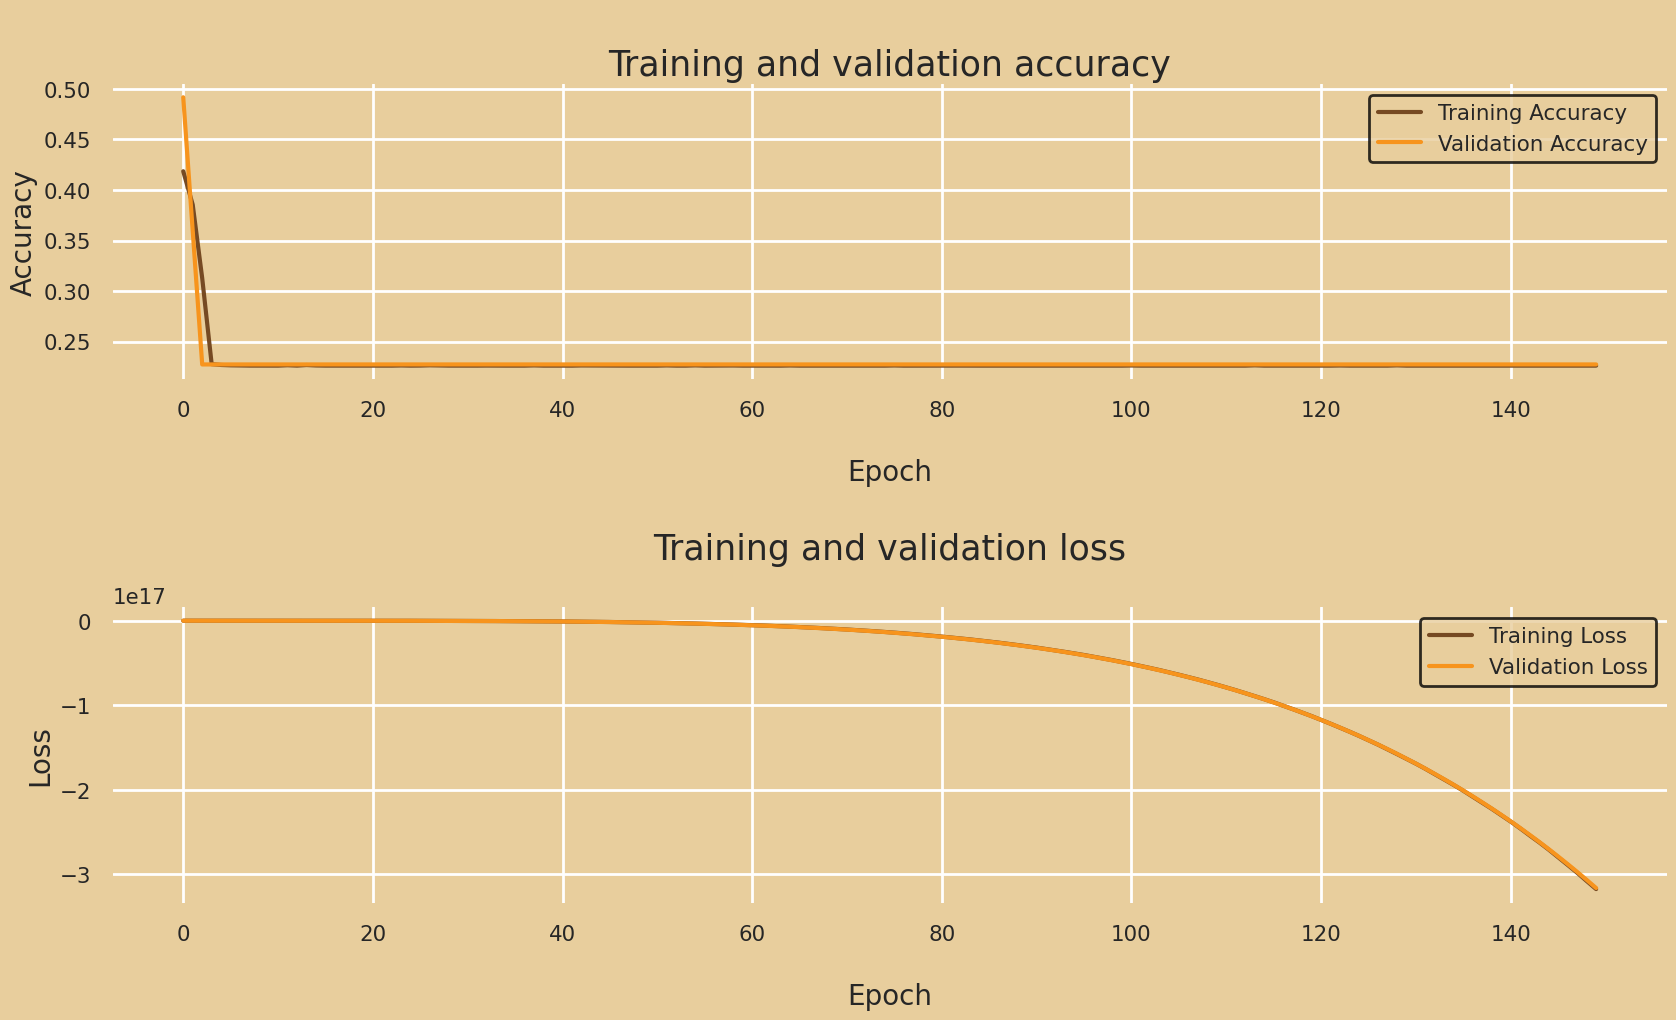

In [41]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc)) # number of epochs

plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
plt.tight_layout(pad=8.0)

plt.plot(epochs, acc, palette[0], label= "Training Accuracy")
plt.plot(epochs, val_acc, palette[1], label= "Validation Accuracy")
plt.yscale("linear")
plt.title("\nTraining and validation accuracy",fontsize=25)
plt.xlabel("\nEpoch",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.legend(edgecolor="black")

plt.subplot(2,1,2)
plt.plot(epochs, loss, palette[0], label= "Training Loss")
plt.plot(epochs, val_loss, palette[1], label= "Validation Loss")
plt.title("Training and validation loss\n",fontsize=25)
plt.xlabel("\nEpoch",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.legend(edgecolor="black")

sns.despine(left=True, bottom=True)
plt.show()

Logistic Regression , Gaussian Naive Bayes and SVM showed 100% accuracy and are recommended. 